In [ ]:
"""Con el aumento de la esperanza de vida y el rápido crecimiento de la población en todo el mundo, 
cada vez es más difícil para la humanidad satisfacer sus necesidades nutricionales. La ampliación
ineficiente de la producción de alimentos está teniendo un impacto negativo evidente en el 
planeta. La deforestación, el aumento de la ganadería y el uso excesivo de fertilizantes, 
todos ellos relacionados con la producción de alimentos, son los principales factores causales 
detrás del aumento de las emisiones de gases de efecto invernadero y, en consecuencia, del 
calentamiento global.
 
La producción de alimentos, en su intento por satisfacer esta creciente y voraz demanda, ha 
llevado a prácticas insostenibles. La expansión agrícola ha impulsado la deforestación masiva,
eliminando importantes sumideros de carbono. La ganadería intensiva, impulsada por el apetito 
global por carne y productos lácteos, genera cantidades significativas de metano, un potente 
gas de efecto invernadero.

Abordar este desafío requiere no solo repensar los métodos de producción, sino también fomentar 
un cambio cultural hacia un consumo más responsable y sostenible."""

In [1]:
!which python

/Users/kardiahq/Desktop/Project_abril/Agro_Smart/bin/python


In [ ]:
"""PREGUNTAS QUE QUEREMOS RESOLVER PARA ESTE PROYECTO

1-  ¿Qué países destacan por ser más eficientes o menos eficientes en la satisfacción de sus 
    necesidades alimentarias?
2-  ¿Cuáles son los alimentos más consumidos, tanto a nivel global como por país, y cómo 
    contribuyen al impacto ambiental en términos de emisiones de carbono?
3-  ¿Cuál es la relación entre el aumento de la temperatura global y las tendencias de emisiones
     agrícolas?

"""

In [ ]:
"PUNT_O1_(Extract, Transform, Load)
"A_EXTRACT"

"""
He realizado el conjunto de datos de Estadísticas Globales de Alimentación y Agricultura .
Aunque el conjunto de datos en Kaggle se encuentra bien estructurado, decidí realizar un 
preprocesamiento adicional para asegurarnos de que los datos sean consistentes y adecuados para
nuestro análisis. En el proceso de extracción verifiqué que los datasets estubieran bien cargados,
validando que los archivos no estubieran vacios y mostrando información básica sobre los 
datasets. En el apartado de transformacíon de los datos, el proceso fue ordenado. Empezacé por
eleminar duplicados, remplazar valores nulos y normalizar nombres en columnas ( eliminando
espacios, nombres de columnas a minúsculas ). Seguidamente aplicamos funciones a columnas
específicas,etc. Finalmente acabamos el proceso por el guardado de datos procesados y
Garantizar que el script sea robusto y no se detenga ante problemas menores. Debido a 
la amplia gama de información que contenía el conjunto de datos original en Kaggle,
decidimos enfocarnos en los datos más relevantes para abordar nuestras preguntas de investigación.
 """


In [22]:
"01_EXTRACT/LOAD"
import os
import pandas as pd

# Crear la carpeta para los datos procesados si no existe
processed_path = "./data/processed/"
os.makedirs(processed_path, exist_ok=True)

# Cargar los datasets
try:
    # Dataset 1: GCB2022v27_MtCO2_flat_transformed.csv
    file_path_emissions = "/Users/kardiahq/Desktop/Project_abril/data/processed/GCB2022v27_MtCO2_flat_transformed.csv"
    df_emissions = pd.read_csv(file_path_emissions)
    print(f"Dataset de emisiones cargado correctamente: {file_path_emissions}")

    # Dataset 2: efficiency_data.csv
    file_path_efficiency = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/efficiency_data.csv"
    df_efficiency = pd.read_csv(file_path_efficiency)
    print(f"Dataset de eficiencia cargado correctamente: {file_path_efficiency}")

    # Dataset 3: Food_Production.csv
    file_path_food_production = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Food_Production.csv"
    df_food_production = pd.read_csv(file_path_food_production)
    print(f"Dataset de producción de alimentos cargado correctamente: {file_path_food_production}")

    # Dataset 4: Environment_Temperature_change_E_All_Data_NOFLAG.csv
    file_path_temperature = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv"
    try:
        # Intentar cargar con codificación "latin1"
        df_temperature = pd.read_csv(file_path_temperature, encoding="latin1")
        print(f"Dataset de temperatura global cargado correctamente: {file_path_temperature}")
    except Exception as e:
        print(f"Error al cargar el dataset de temperatura: {e}")
        print("Intentando detectar la codificación del archivo...")

        # Detectar la codificación del archivo
        import chardet
        with open(file_path_temperature, "rb") as f:
            result = chardet.detect(f.read())
            detected_encoding = result["encoding"]
            print(f"Codificación detectada: {detected_encoding}")

        # Intentar cargar con la codificación detectada
        try:
            df_temperature = pd.read_csv(file_path_temperature, encoding=detected_encoding)
            print(f"Dataset de temperatura global cargado correctamente con codificación detectada: {file_path_temperature}")
        except Exception as e:
            print(f"Error al cargar el dataset de temperatura incluso con la codificación detectada: {e}")

except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. {e}")
except Exception as e:
    print(f"Error al cargar los datasets: {e}")

Dataset de emisiones cargado correctamente: /Users/kardiahq/Desktop/Project_abril/data/processed/GCB2022v27_MtCO2_flat_transformed.csv
Dataset de eficiencia cargado correctamente: /Users/kardiahq/Desktop/Project_abril/Agro_Smart/efficiency_data.csv
Dataset de producción de alimentos cargado correctamente: /Users/kardiahq/Desktop/Project_abril/Agro_Smart/Food_Production.csv
Dataset de temperatura global cargado correctamente: /Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv


In [23]:
# Crear un diccionario con los datasets cargados
extracted_data = {
    "Emisiones Totales": df_emissions,
    "Eficiencia Alimentaria": df_efficiency,
    "Producción de Alimentos": df_food_production,
    "Temperatura Global": df_temperature
}

# Verificar si los datasets se han cargado correctamente
for dataset_name, data in extracted_data.items():
    if data is not None:
        print(f"\n--- Dataset '{dataset_name}' cargado correctamente ---")
        print(f"Dimensiones: {data.shape}")  # Número de filas y columnas
        print(f"Columnas: {list(data.columns)}")  # Nombres de las columnas
    else:
        print(f"\n--- Error al cargar el dataset '{dataset_name}' ---")


--- Dataset 'Emisiones Totales' cargado correctamente ---
Dimensiones: (5104, 12)
Columnas: ['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita', 'Coal_Percentage']

--- Dataset 'Eficiencia Alimentaria' cargado correctamente ---
Dimensiones: (165, 4)
Columnas: ['Area', 'Food', 'Feed', 'Efficiency']

--- Dataset 'Producción de Alimentos' cargado correctamente ---
Dimensiones: (43, 23)
Columnas: ['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Greenhouse gas emissions pe

In [24]:
"02_TRANSFORM"
"En esta sección, realizaremos la transformación de los datos"

# Función para transformar un dataset
def transform_data(dataset_name, data):
    print(f"\n--- Transformando dataset: {dataset_name} ---")
    try:
        # Reemplazar valores "[NONE]" por NaN
        data.replace("[NONE]", pd.NA, inplace=True)

        # Convertir columnas numéricas a tipo float (si aplica)
        numeric_columns = ["Total", "Coal", "Oil", "Gas", "Cement", "Flaring", "Other", "Per Capita"]
        for col in numeric_columns:
            if col in data.columns:
                data[col] = pd.to_numeric(data[col], errors="coerce")

        # Verificar y eliminar duplicados
        print(f"Duplicados antes de eliminar: {data.duplicated().sum()}")
        data.drop_duplicates(inplace=True)

        # Crear una nueva columna : Porcentaje de emisiones de carbón respecto al total
        if "Coal" in data.columns and "Total" in data.columns:
            data["Coal_Percentage"] = (data["Coal"] / data["Total"]) * 100

        # Filtrar datos relevantes 
        if "Year" in data.columns:
            data = data[data["Year"] >= 2000]

        print(f"Transformación completada para el dataset '{dataset_name}'.")
        return data
    except Exception as e:
        print(f"Error al transformar el dataset '{dataset_name}': {e}")
        return None

# Aplicar la transformación a los 4 datasets utilizados en el proyecto
transformed_data = {}
for dataset_name, data in extracted_data.items():
    if data is not None:
        transformed_data[dataset_name] = transform_data(dataset_name, data)

# Verificar los resultados de la transformación
for dataset_name, data in transformed_data.items():
    if data is not None:
        print(f"\n--- Dataset transformado: {dataset_name} ---")
        print(data.head())
        print(f"Dimensiones después de la transformación: {data.shape}")


--- Transformando dataset: Emisiones Totales ---
Duplicados antes de eliminar: 0
Transformación completada para el dataset 'Emisiones Totales'.

--- Transformando dataset: Eficiencia Alimentaria ---
Duplicados antes de eliminar: 0
Transformación completada para el dataset 'Eficiencia Alimentaria'.

--- Transformando dataset: Producción de Alimentos ---
Duplicados antes de eliminar: 0
Transformación completada para el dataset 'Producción de Alimentos'.

--- Transformando dataset: Temperatura Global ---
Duplicados antes de eliminar: 0
Transformación completada para el dataset 'Temperatura Global'.

--- Dataset transformado: Emisiones Totales ---
       Country ISO 3166-1 alpha-3  Year     Total      Coal       Oil  \
0  Afghanistan                AFG  2000  1.047128  0.003664  0.787760   
1  Afghanistan                AFG  2001  1.069098  0.069616  0.762112   
2  Afghanistan                AFG  2002  1.340995  0.055109  0.727438   
3  Afghanistan                AFG  2003  1.559602  0.09

In [25]:
# Ruta para guardar los datasets transformados
processed_path = "/Users/kardiahq/Desktop/Project_abril/data/processed/"

# Guardar cada dataset transformado
for dataset_name, data in transformed_data.items():
    if data is not None:
        # Crear un nombre de archivo claro y consistente
        file_name = dataset_name.replace(" ", "_").lower() + "_transformed.csv"
        processed_file_path = os.path.join(processed_path, file_name)
        
        # Guardar el dataset transformado
        data.to_csv(processed_file_path, index=False)
        print(f"Dataset transformado '{dataset_name}' guardado en: {processed_file_path}")

Dataset transformado 'Emisiones Totales' guardado en: /Users/kardiahq/Desktop/Project_abril/data/processed/emisiones_totales_transformed.csv
Dataset transformado 'Eficiencia Alimentaria' guardado en: /Users/kardiahq/Desktop/Project_abril/data/processed/eficiencia_alimentaria_transformed.csv
Dataset transformado 'Producción de Alimentos' guardado en: /Users/kardiahq/Desktop/Project_abril/data/processed/producción_de_alimentos_transformed.csv
Dataset transformado 'Temperatura Global' guardado en: /Users/kardiahq/Desktop/Project_abril/data/processed/temperatura_global_transformed.csv


In [ ]:
"""1-  ¿Qué países destacan por ser más eficientes o menos eficientes en la satisfacción de sus 
     necesidades alimentarias?"""


--- Países más eficientes ---
                  Area   Food   Feed  Efficiency
0              Denmark  11589  15671    1.352231
1              Belarus  17445  20407    1.169791
2              Ukraine  79580  74170    0.932018
3             Paraguay   8316   7314    0.879509
4               Serbia  14236  11163    0.784139
5               Canada  67893  52274    0.769947
6  Republic of Moldova   4643   3303    0.711393
7              Ireland  10643   7517    0.706286
8         Turkmenistan   7082   4972    0.702062
9                Spain  81051  56543    0.697622

--- Países menos eficientes ---
                         Area   Food  Feed  Efficiency
155                    Uganda  40247   697    0.017318
156      China, Hong Kong SAR  11557   199    0.017219
157                     Sudan  42997   664    0.015443
158             Guinea-Bissau   1220    10    0.008197
159                   Senegal  10653    76    0.007134
160                     Congo   5168    32    0.006192
161         

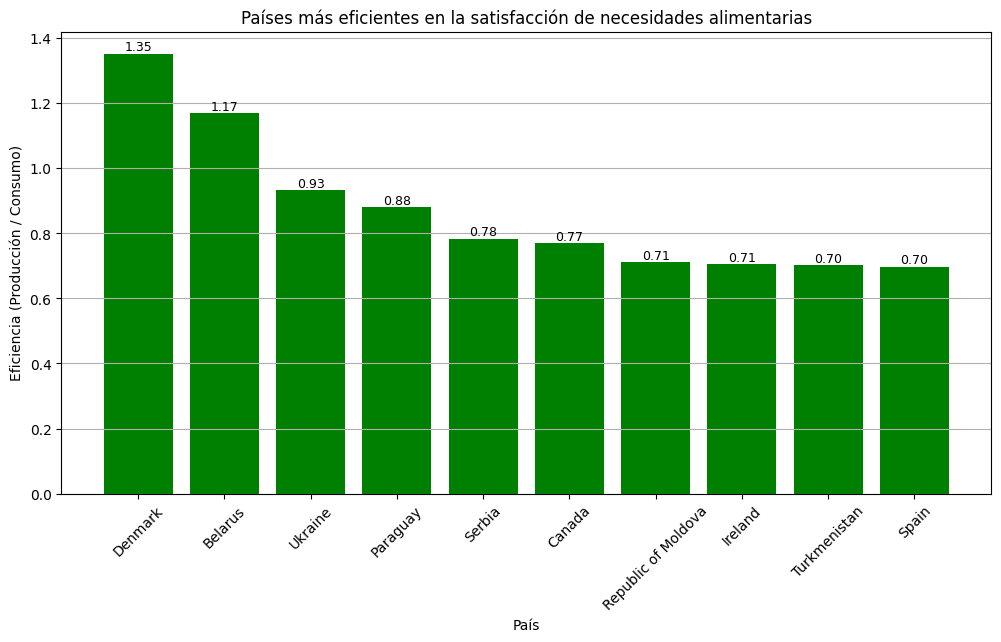

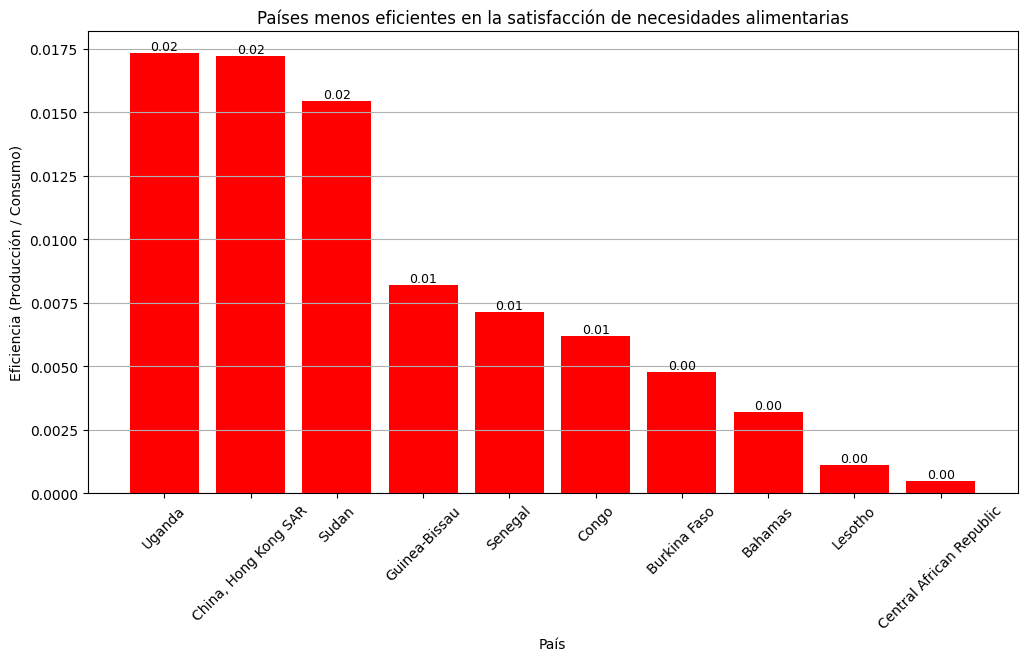

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/efficiency_data.csv"
data = pd.read_csv(file_path)

# Ordenar por eficiencia
data_sorted = data.sort_values(by="Efficiency", ascending=False)

# Mostrar los países más y menos eficientes
print("\n--- Países más eficientes ---")
print(data_sorted.head(10))

print("\n--- Países menos eficientes ---")
print(data_sorted.tail(10))

# Visualizar los países más eficientes
top_efficient = data_sorted.head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_efficient["Area"], top_efficient["Efficiency"], color="green")
plt.title("Países más eficientes en la satisfacción de necesidades alimentarias")
plt.xlabel("País")
plt.ylabel("Eficiencia (Producción / Consumo)")
plt.xticks(rotation=45)

# Agregar etiquetas con los valores de eficiencia
for bar, efficiency in zip(bars, top_efficient["Efficiency"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{efficiency:.2f}", 
             ha="center", va="bottom", fontsize=9)

plt.grid(axis="y")
plt.show()

# Visualizar los países menos eficientes
bottom_efficient = data_sorted.tail(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_efficient["Area"], bottom_efficient["Efficiency"], color="red")
plt.title("Países menos eficientes en la satisfacción de necesidades alimentarias")
plt.xlabel("País")
plt.ylabel("Eficiencia (Producción / Consumo)")
plt.xticks(rotation=45)

# Agregar etiquetas con los valores de eficiencia
for bar, efficiency in zip(bars, bottom_efficient["Efficiency"]):
    plt.text(bar.get_x() + bar.getth() / 2, bar.get_height(), f"{efficiency:.2f}", 
             ha="center", va="bottom", fontsize=9)

plt.grid(axis="y")
plt.show()

In [ ]:
# Observo que para generar mas patrones podria agrupar paises por continentes.
print(data_sorted.columns)

Index(['Area', 'Food', 'Feed', 'Efficiency'], dtype='object')


In [14]:
# Crear un diccionario para mapear países a regiones
country_to_region = {
    "Denmark": "Europe",
    "Belarus": "Europe",
    "Ukraine": "Europe",
    "Paraguay": "South America",
    # Agrega más países y regiones según sea necesario
}

# Crear una nueva columna 'Region' basada en el diccionario
data_sorted["Region"] = data_sorted["Area"].map(country_to_region)

# Verificar si la columna 'Region' se agregó correctamente
print(data_sorted[["Area", "Region"]].head())

       Area         Region
0   Denmark         Europe
1   Belarus         Europe
2   Ukraine         Europe
3  Paraguay  South America
4    Serbia            NaN


In [15]:
# Agrupar por región y calcular la eficiencia promedio
efficiency_by_region = data_sorted.groupby("Region")["Efficiency"].mean().sort_values(ascending=False)

# Mostrar los resultados
print("\n--- Eficiencia promedio por región ---")
print(efficiency_by_region)


--- Eficiencia promedio por región ---
Region
Europe           1.151346
South America    0.879509
Name: Efficiency, dtype: float64


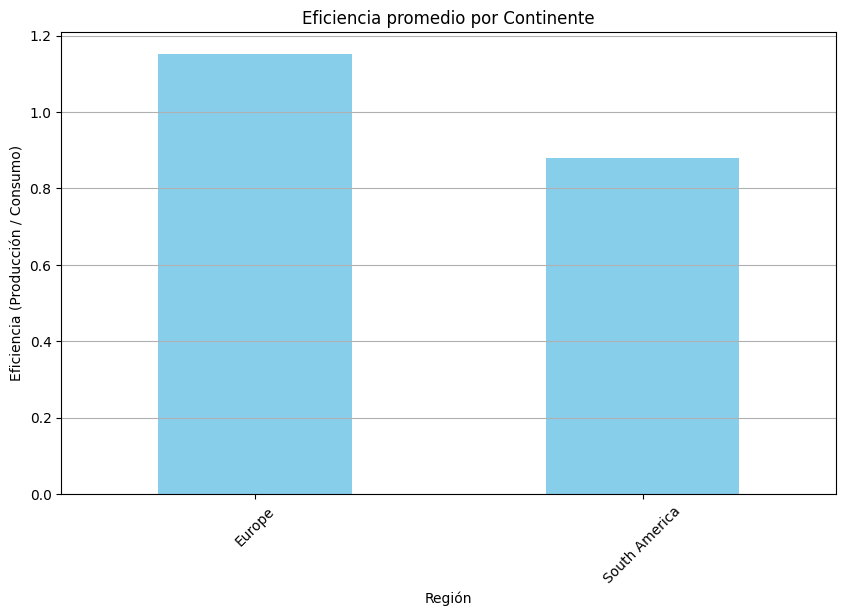

In [16]:
# Visualizar la eficiencia promedio por Continente
plt.figure(figsize=(10, 6))
efficiency_by_region.plot(kind="bar", color="skyblue")
plt.title("Eficiencia promedio por Continente")
plt.xlabel("Región")
plt.ylabel("Eficiencia (Producción / Consumo)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_53686/1557512239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Efficiency", data=data_sorted, palette="Set2")


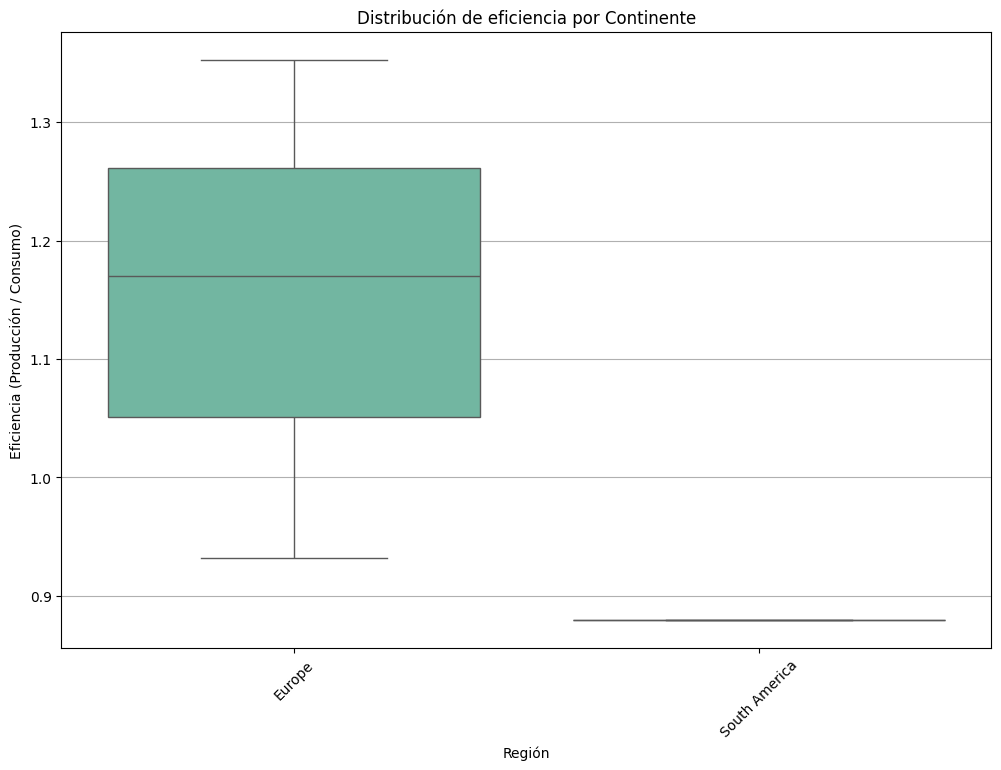

In [19]:
"Comparar eficiencia entre países dentro de cada Continente"

# Boxplot para visualizar la distribución de eficiencia por región
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.boxplot(x="Region", y="Efficiency", data=data_sorted, palette="Set2")
plt.title("Distribución de eficiencia por Continente")
plt.xlabel("Región")
plt.ylabel("Eficiencia (Producción / Consumo)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [20]:
"Comparar eficiencia entre países dentro de cada Continente"

# Países más y menos eficientes por región
most_efficient_by_region = data_sorted.loc[data_sorted.groupby("Region")["Efficiency"].idxmax()]
least_efficient_by_region = data_sorted.loc[data_sorted.groupby("Region")["Efficiency"].idxmin()]

print("\n--- Países más eficientes por continente ---")
print(most_efficient_by_region[["Region", "Area", "Efficiency"]])

print("\n--- Países menos eficientes por continente ---")
print(least_efficient_by_region[["Region", "Area", "Efficiency"]])


--- Países más eficientes por continente ---
          Region      Area  Efficiency
0         Europe   Denmark    1.352231
3  South America  Paraguay    0.879509

--- Países menos eficientes por continente ---
          Region      Area  Efficiency
2         Europe   Ukraine    0.932018
3  South America  Paraguay    0.879509


In [ ]:
"Para averiguar comparar la eficiencia vs producción de alimentos"
print(data_sorted.columns)

Index(['Area', 'Food', 'Feed', 'Efficiency', 'Region'], dtype='object')


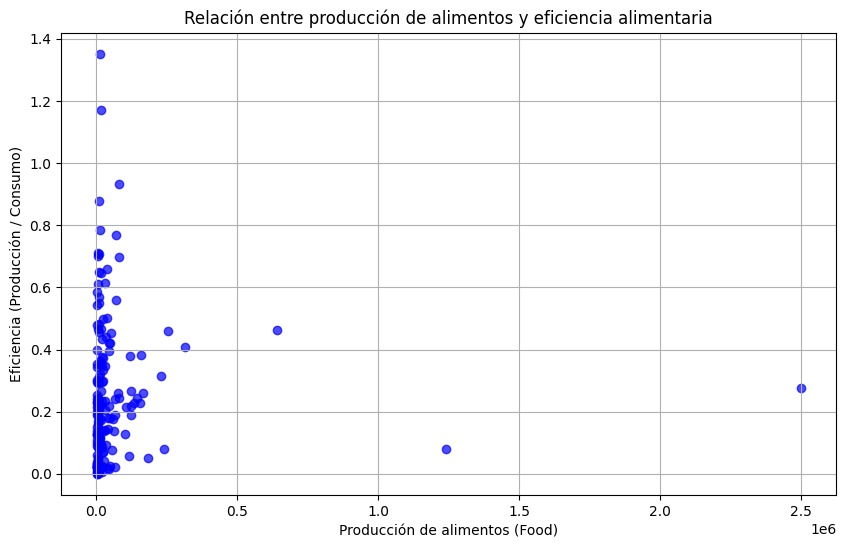

In [26]:
# Scatter plot de eficiencia vs producción de alimentos
plt.figure(figsize=(10, 6))
plt.scatter(data_sorted["Food"], data_sorted["Efficiency"], alpha=0.7, color="blue")
plt.title("Relación entre producción de alimentos y eficiencia alimentaria")
plt.xlabel("Producción de alimentos (Food)")
plt.ylabel("Eficiencia (Producción / Consumo)")
plt.grid()
plt.show()

In [27]:
# Estadísticas de tendencia central
mean = food_data["Total_emissions"].mean()
median = food_data["Total_emissions"].median()
mode = food_data["Total_emissions"].mode()[0]

print(f"Media: {mean:.2f}")
print(f"Mediana: {median:.2f}")
print(f"Moda: {mode:.2f}")

Media: 5.97
Mediana: 1.60
Moda: 0.30


In [28]:
# Medidas de dispersión
data_range = food_data["Total_emissions"].max() - food_data["Total_emissions"].min()
variance = food_data["Total_emissions"].var()
std_dev = food_data["Total_emissions"].std()
percentiles = food_data["Total_emissions"].quantile([0.25, 0.5, 0.75])

print(f"Rango: {data_range:.2f}")
print(f"Varianza: {variance:.2f}")
print(f"Desviación estándar: {std_dev:.2f}")
print("\nPercentiles:")
print(percentiles)

Rango: 59.40
Varianza: 110.29
Desviación estándar: 10.50

Percentiles:
0.25    0.85
0.50    1.60
0.75    6.00
Name: Total_emissions, dtype: float64


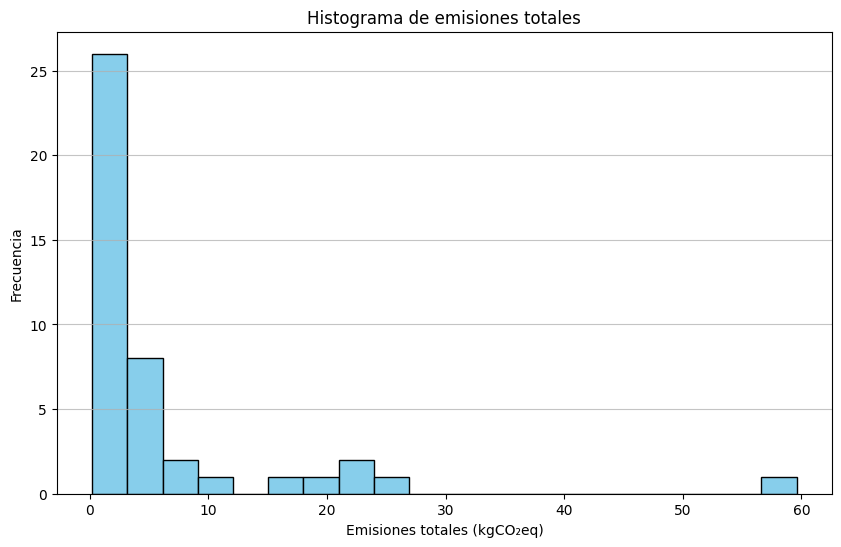

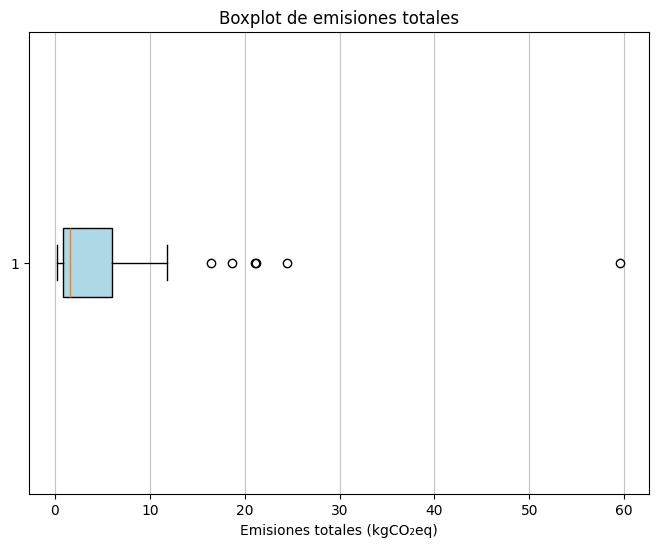

/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_59679/1060479055.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(food_data["Total_emissions"], shade=True, color="blue")


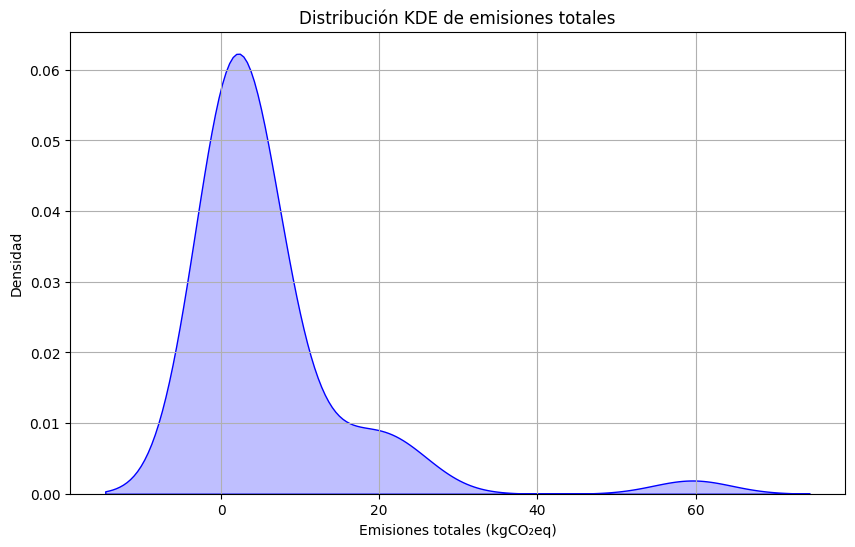

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(food_data["Total_emissions"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma de emisiones totales")
plt.xlabel("Emisiones totales (kgCO₂eq)")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.75)
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(food_data["Total_emissions"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot de emisiones totales")
plt.xlabel("Emisiones totales (kgCO₂eq)")
plt.grid(axis="x", alpha=0.75)
plt.show()

# KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.kdeplot(food_data["Total_emissions"], shade=True, color="blue")
plt.title("Distribución KDE de emisiones totales")
plt.xlabel("Emisiones totales (kgCO₂eq)")
plt.ylabel("Densidad")
plt.grid()
plt.show()

In [ ]:
"""2-¿Cuáles son los alimentos más consumidos, tanto a nivel global como por país, y cómo 
    contribuyen al impacto ambiental en términos de emisiones de carbono?"""


--- Vista previa del dataset ---
          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2         

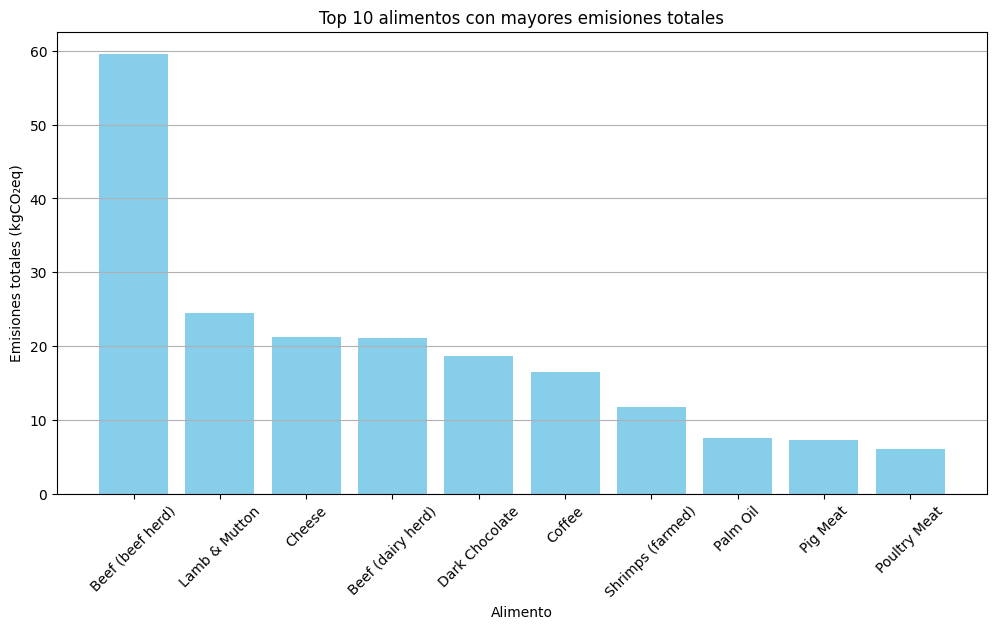

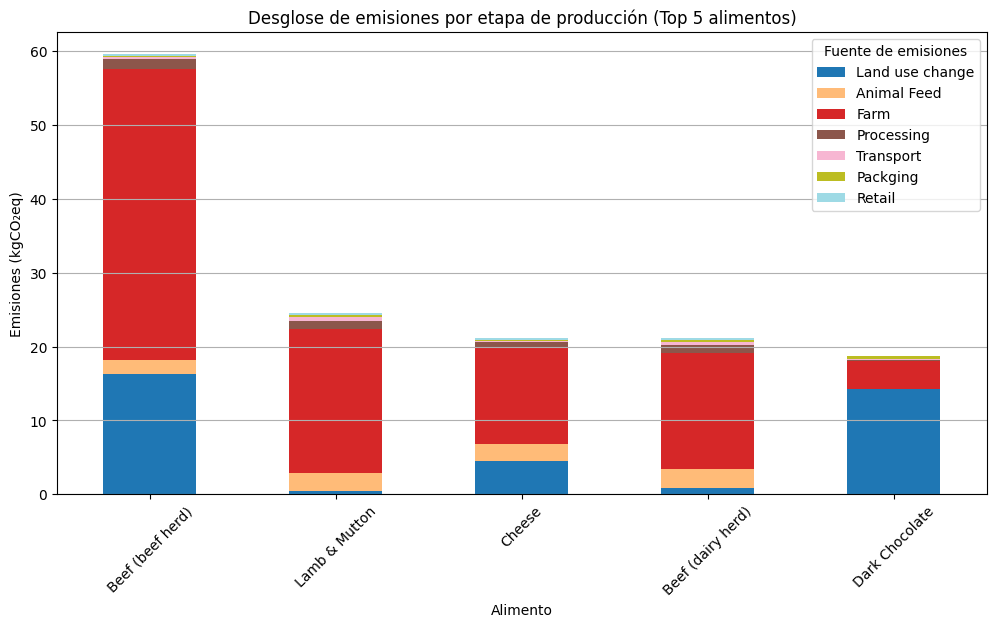

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset de producción de alimentos
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Food_Production.csv"
food_data = pd.read_csv(file_path)

# Vista previa del dataset
print("\n--- Vista previa del dataset ---")
print(food_data.head())

# Verificar las columnas disponibles
print("\n--- Columnas disponibles en el dataset ---")
print(food_data.columns)

# Identificar los alimentos con mayores emisiones totales
top_emissions = food_data.sort_values(by="Total_emissions", ascending=False)

# Mostrar los 10 alimentos con mayores emisiones totales
print("\n--- Alimentos con mayores emisiones totales ---")
print(top_emissions[["Food product", "Total_emissions"]].head(10))

# Visualizar los alimentos con mayores emisiones totales
plt.figure(figsize=(12, 6))
plt.bar(top_emissions["Food product"].head(10), top_emissions["Total_emissions"].head(10), color="skyblue")
plt.title("Top 10 alimentos con mayores emisiones totales")
plt.xlabel("Alimento")
plt.ylabel("Emisiones totales (kgCO₂eq)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Desglosar las fuentes de emisiones para los 5 alimentos principales
top_5_emissions = top_emissions.head(5)
emission_sources = ["Land use change", "Animal Feed", "Farm", "Processing", "Transport", "Packging", "Retail"]

# Crear un gráfico de barras apiladas para las fuentes de emisiones
top_5_emissions.set_index("Food product")[emission_sources].plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Desglose de emisiones por etapa de producción (Top 5 alimentos)")
plt.xlabel("Alimento")
plt.ylabel("Emisiones (kgCO₂eq)")
plt.xticks(rotation=45)
plt.legend(title="Fuente de emisiones")
plt.grid(axis="y")
plt.show()

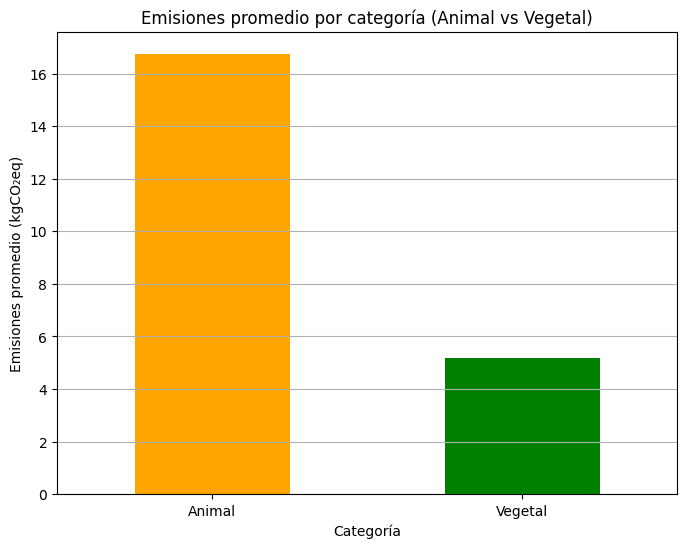

In [43]:
# Crear una nueva columna para clasificar los alimentos como 'Animal' o 'Vegetal'
animal_products = ["Beef", "Lamb & Mutton", "Cheese", "Pork", "Poultry", "Eggs", "Fish"]
food_data["Category"] = food_data["Food product"].apply(lambda x: "Animal" if x in animal_products else "Vegetal")

# Calcular las emisiones promedio por categoría
category_emissions = food_data.groupby("Category")["Total_emissions"].mean()

# Visualizar las emisiones promedio por categoría
plt.figure(figsize=(8, 6))
category_emissions.plot(kind="bar", color=["orange", "green"])
plt.title("Emisiones promedio por categoría (Animal vs Vegetal)")
plt.xlabel("Categoría")
plt.ylabel("Emisiones promedio (kgCO₂eq)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


--- Alimentos con menores emisiones totales ---
        Food product  Total_emissions
11              Nuts              0.2
21    Onions & Leeks              0.3
25      Citrus Fruit              0.3
22   Root Vegetables              0.3
5           Potatoes              0.3
27            Apples              0.3
23         Brassicas              0.4
24  Other Vegetables              0.5
30       Other Fruit              0.7
10              Peas              0.8


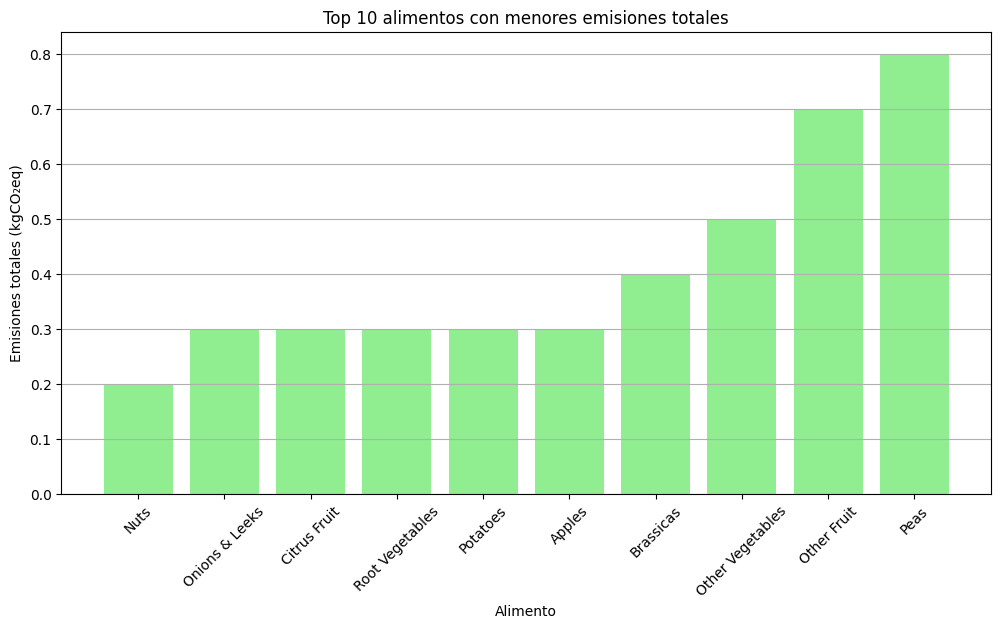

In [44]:
# Identificar los 10 alimentos con menores emisiones totales
low_emissions = food_data.sort_values(by="Total_emissions", ascending=True)

# Mostrar los 10 alimentos con menores emisiones totales
print("\n--- Alimentos con menores emisiones totales ---")
print(low_emissions[["Food product", "Total_emissions"]].head(10))

# Visualizar los alimentos con menores emisiones totales
plt.figure(figsize=(12, 6))
plt.bar(low_emissions["Food product"].head(10), low_emissions["Total_emissions"].head(10), color="lightgreen")
plt.title("Top 10 alimentos con menores emisiones totales")
plt.xlabel("Alimento")
plt.ylabel("Emisiones totales (kgCO₂eq)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


--- Vista previa del dataset ---
          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2         

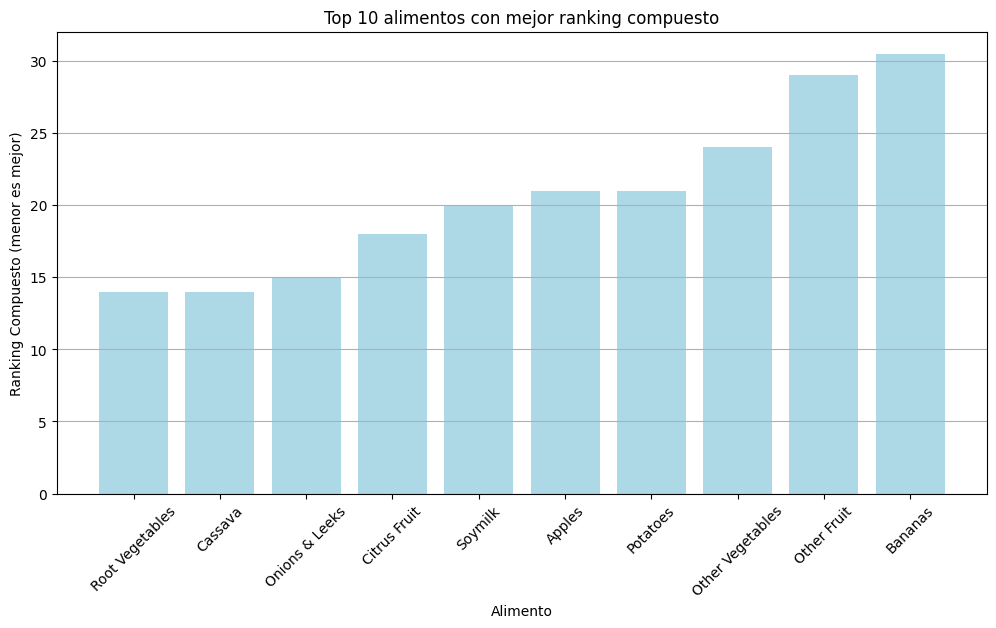

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Food_Production.csv"
food_data = pd.read_csv(file_path)

# Verificar que el dataset se cargó correctamente
print("\n--- Vista previa del dataset ---")
print(food_data.head())

# Crear un ranking basado en emisiones, uso de agua y emisiones eutróficas
food_data["Composite_Rank"] = (
    food_data["Total_emissions"].rank(ascending=True) +
    food_data["Freshwater withdrawals per kilogram (liters per kilogram)"].rank(ascending=True) +
    food_data["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].rank(ascending=True)
)

# Ordenar los alimentos por el ranking compuesto
composite_ranking = food_data.sort_values(by="Composite_Rank", ascending=True)

# Mostrar los 10 alimentos con mejor ranking compuesto
print("\n--- Alimentos con mejor ranking compuesto ---")
print(composite_ranking[["Food product", "Composite_Rank"]].head(10))

# Visualizar los alimentos con mejor ranking compuesto
plt.figure(figsize=(12, 6))
plt.bar(composite_ranking["Food product"].head(10), composite_ranking["Composite_Rank"].head(10), color="lightblue")
plt.title("Top 10 alimentos con mejor ranking compuesto")
plt.xlabel("Alimento")
plt.ylabel("Ranking Compuesto (menor es mejor)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [ ]:
# Estadísticas descriptivas por categoría
print("\n--- Estadísticas descriptivas por categoría ---")
print(food_data.groupby("Category")["Total_emissions"].describe())

# Boxplot de emisiones por categoría
plt.figure(figsize=(10, 6))
food_data.boxplot(column="Total_emissions", by="Category", grid=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Distribución de emisiones por categoría")
plt.suptitle("")  # Eliminar título automático de pandas
plt.xlabel("Categoría")
plt.ylabel("Emisiones totales (kgCO₂eq)")
plt.show()

In [9]:
# Calcular percentiles de emisiones totales
percentiles = food_data["Total_emissions"].quantile([0.25, 0.5, 0.75, 0.9])
print("\n--- Percentiles de emisiones totales ---")
print(percentiles)

# Filtrar alimentos en el percentil 90
high_emission_foods = food_data[food_data["Total_emissions"] > percentiles[0.9]]
print("\n--- Alimentos en el percentil 90 de emisiones totales ---")
print(high_emission_foods[["Food product", "Total_emissions"]])


--- Percentiles de emisiones totales ---
0.25     0.85
0.50     1.60
0.75     6.00
0.90    18.26
Name: Total_emissions, dtype: float64

--- Alimentos en el percentil 90 de emisiones totales ---
         Food product  Total_emissions
32     Dark Chocolate             18.7
33   Beef (beef herd)             59.6
34  Beef (dairy herd)             21.1
35      Lamb & Mutton             24.5
39             Cheese             21.2



--- Correlación entre emisiones totales y uso de agua: 0.33 ---


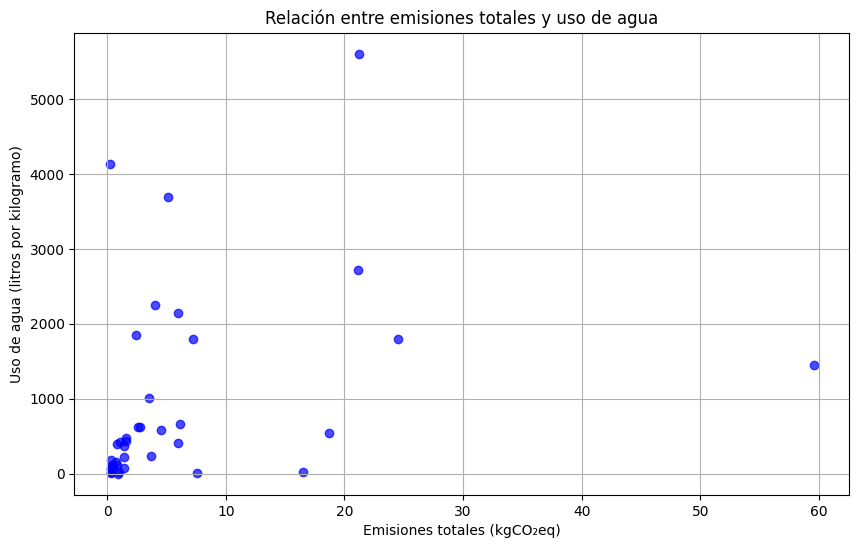

In [10]:
# Correlación entre emisiones totales y uso de agua
correlation = food_data["Total_emissions"].corr(food_data["Freshwater withdrawals per kilogram (liters per kilogram)"])
print(f"\n--- Correlación entre emisiones totales y uso de agua: {correlation:.2f} ---")

# Scatter plot de la relación
plt.figure(figsize=(10, 6))
plt.scatter(food_data["Total_emissions"], food_data["Freshwater withdrawals per kilogram (liters per kilogram)"], alpha=0.7, color="blue")
plt.title("Relación entre emisiones totales y uso de agua")
plt.xlabel("Emisiones totales (kgCO₂eq)")
plt.ylabel("Uso de agua (litros por kilogramo)")
plt.grid()
plt.show()

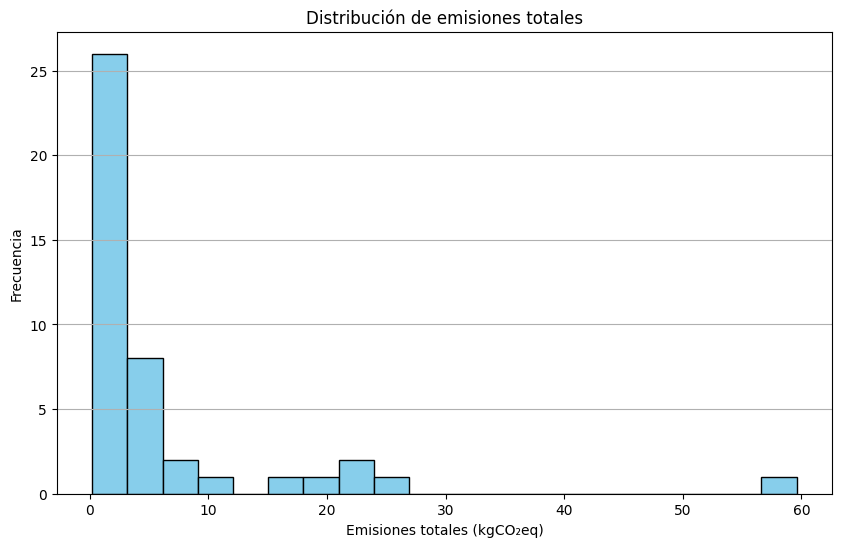

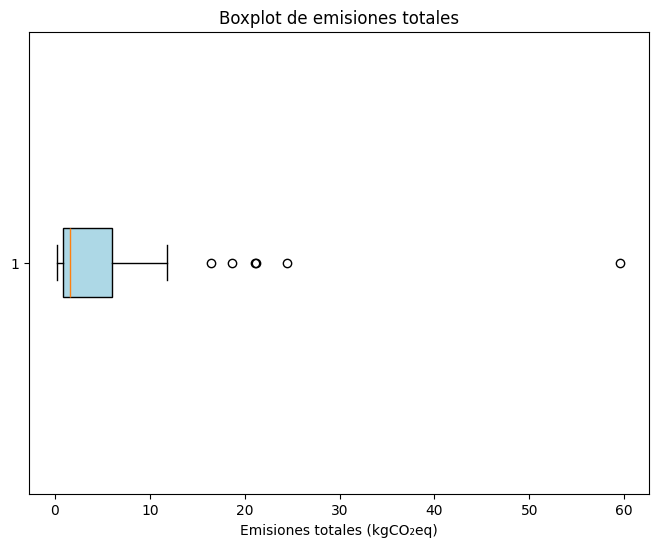

In [11]:
# Histograma de emisiones totales
plt.figure(figsize=(10, 6))
plt.hist(food_data["Total_emissions"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de emisiones totales")
plt.xlabel("Emisiones totales (kgCO₂eq)")
plt.ylabel("Frecuencia")
plt.grid(axis="y")
plt.show()

# Boxplot de emisiones totales
plt.figure(figsize=(8, 6))
plt.boxplot(food_data["Total_emissions"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot de emisiones totales")
plt.xlabel("Emisiones totales (kgCO₂eq)")
plt.show()

In [12]:
# Estadísticas descriptivas de emisiones totales
print("\n--- Estadísticas descriptivas de emisiones totales ---")
print(food_data["Total_emissions"].describe())


--- Estadísticas descriptivas de emisiones totales ---
count    43.000000
mean      5.972093
std      10.501753
min       0.200000
25%       0.850000
50%       1.600000
75%       6.000000
max      59.600000
Name: Total_emissions, dtype: float64


In [ ]:
"""3-  ¿Cuál es la relación entre el aumento de la temperatura global y las tendencias de emisiones
     agrícolas?"""

Top 10 años con mayor aumento de temperatura:
    Year  Temperature_Change
58  2019            1.094599
55  2016            1.081491
54  2015            1.018816
57  2018            1.010832
56  2017            1.003342
53  2014            0.913872
49  2010            0.884504
46  2007            0.842554
52  2013            0.829647
37  1998            0.818264


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_75287/648432506.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_years, x="Year", y="Temperature_Change", palette="coolwarm")


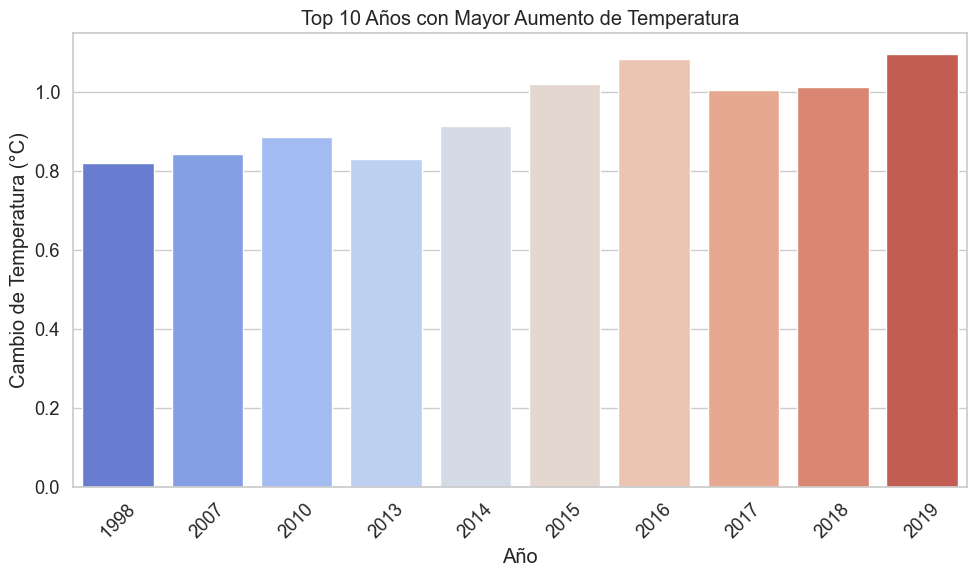

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv"

# Leer el archivo con la codificación correcta
try:
    df_temperature = pd.read_csv(file_path, encoding="ISO-8859-1")  # Cambia "ISO-8859-1" si es necesario
except UnicodeDecodeError:
    print("Error al leer el archivo. Intenta con otra codificación.")
    raise

# Transformar columnas de años en filas (si las columnas de años tienen el prefijo "Y")
year_columns = [col for col in df_temperature.columns if col.startswith("Y")]

# Convertir a formato largo
df_temperature_long = pd.melt(
    df_temperature,
    id_vars=["Area"],  # Mantener columnas como "Area" o "Country"
    value_vars=year_columns,  # Columnas de años
    var_name="Year",  # Nueva columna para los años
    value_name="Temperature_Change"  # Nueva columna para los valores
)

# Limpiar la columna "Year" para eliminar el prefijo "Y"
df_temperature_long["Year"] = df_temperature_long["Year"].str.lstrip("Y").astype(int)

# Agrupar por año y calcular el promedio del cambio de temperatura
df_top_years = df_temperature_long.groupby("Year")["Temperature_Change"].mean().reset_index()

# Ordenar por el cambio de temperatura en orden descendente
df_top_years = df_top_years.sort_values(by="Temperature_Change", ascending=False)

# Seleccionar los 10 años con el mayor aumento de temperatura
top_10_years = df_top_years.head(10)

# Mostrar los valores del top 10 en la consola
print("Top 10 años con mayor aumento de temperatura:")
print(top_10_years)

# Configuración del estilo de los gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_years, x="Year", y="Temperature_Change", palette="coolwarm")
plt.title("Top 10 Años con Mayor Aumento de Temperatura")
plt.xlabel("Año")
plt.ylabel("Cambio de Temperatura (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 años con menor subida de temperatura:
    Year  Temperature_Change
4   1965            0.217839
15  1976            0.221112
10  1971            0.240934
7   1968            0.244870
13  1974            0.261849
6   1967            0.263239
3   1964            0.269382
11  1972            0.302553
14  1975            0.314653
1   1962            0.315527


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_75287/1982557731.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_years, x="Year", y="Temperature_Change", palette="coolwarm")


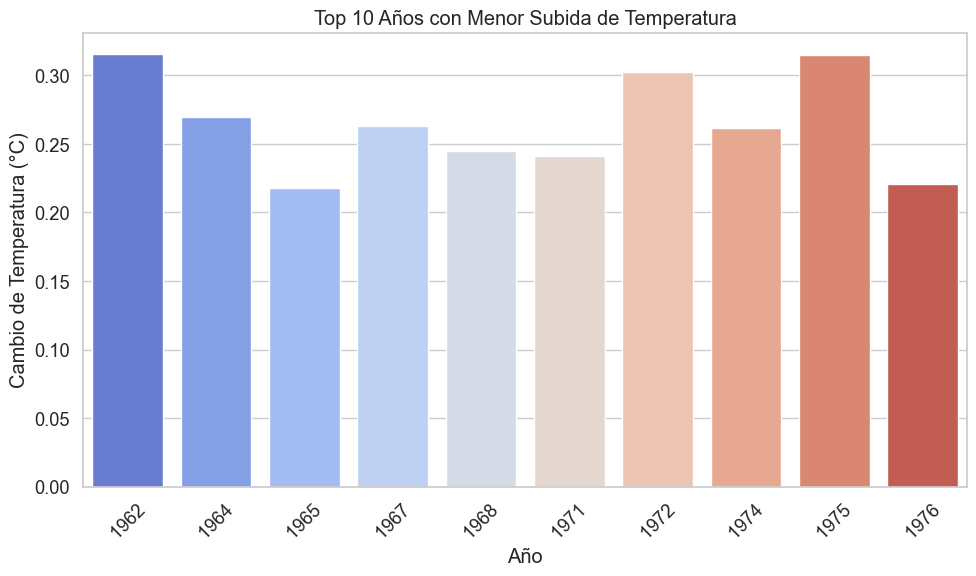

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv"

# Leer el archivo con la codificación correcta
try:
    df_temperature = pd.read_csv(file_path, encoding="ISO-8859-1")  # Cambia "ISO-8859-1" si es necesario
except UnicodeDecodeError:
    print("Error al leer el archivo. Intenta con otra codificación.")
    raise

# Transformar columnas de años en filas (si las columnas de años tienen el prefijo "Y")
year_columns = [col for col in df_temperature.columns if col.startswith("Y")]

# Convertir a formato largo
df_temperature_long = pd.melt(
    df_temperature,
    id_vars=["Area"],  # Mantener columnas como "Area" o "Country"
    value_vars=year_columns,  # Columnas de años
    var_name="Year",  # Nueva columna para los años
    value_name="Temperature_Change"  # Nueva columna para los valores
)

# Limpiar la columna "Year" para eliminar el prefijo "Y"
df_temperature_long["Year"] = df_temperature_long["Year"].str.lstrip("Y").astype(int)

# Agrupar por año y calcular el promedio del cambio de temperatura
df_bottom_years = df_temperature_long.groupby("Year")["Temperature_Change"].mean().reset_index()

# Ordenar por el cambio de temperatura en orden ascendente
df_bottom_years = df_bottom_years.sort_values(by="Temperature_Change", ascending=True)

# Seleccionar los 10 años con la menor subida de temperatura
bottom_10_years = df_bottom_years.head(10)

# Mostrar los valores del top 10 en la consola
print("Top 10 años con menor subida de temperatura:")
print(bottom_10_years)

# Configuración del estilo de los gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_years, x="Year", y="Temperature_Change", palette="coolwarm")
plt.title("Top 10 Años con Menor Subida de Temperatura")
plt.xlabel("Año")
plt.ylabel("Cambio de Temperatura (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 países con mayor aumento de temperatura:
                               Area  Temperature_Change
244  Svalbard and Jan Mayen Islands            1.574279
221                          Serbia            1.518874
143                      Luxembourg            1.492529
163                      Montenegro            1.490134
83                          Estonia            1.460210
227                        Slovenia            1.430326
25                          Belgium            1.427415
24                          Belarus            1.408882
208              Russian Federation            1.408786
134                          Latvia            1.407250


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_75287/746140065.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_countries, x="Area", y="Temperature_Change", palette="coolwarm")


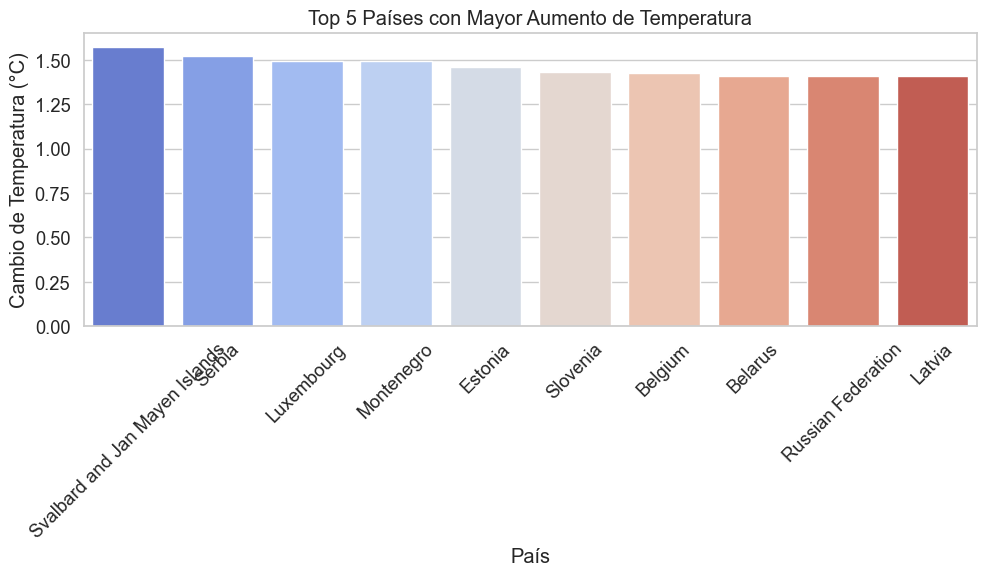

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv"

# Leer el archivo con la codificación correcta
try:
    df_temperature = pd.read_csv(file_path, encoding="ISO-8859-1")  # Cambia "ISO-8859-1" si es necesario
except UnicodeDecodeError:
    print("Error al leer el archivo. Intenta con otra codificación.")
    raise

# Transformar columnas de años en filas (si las columnas de años tienen el prefijo "Y")
year_columns = [col for col in df_temperature.columns if col.startswith("Y")]

# Convertir a formato largo
df_temperature_long = pd.melt(
    df_temperature,
    id_vars=["Area"],  # Mantener columnas como "Area" o "Country"
    value_vars=year_columns,  # Columnas de años
    var_name="Year",  # Nueva columna para los años
    value_name="Temperature_Change"  # Nueva columna para los valores
)

# Limpiar la columna "Year" para eliminar el prefijo "Y"
df_temperature_long["Year"] = df_temperature_long["Year"].str.lstrip("Y").astype(int)

# Agrupar por país y calcular el promedio del cambio de temperatura
df_countries = df_temperature_long.groupby("Area")["Temperature_Change"].mean().reset_index()

# Ordenar por el cambio de temperatura en orden descendente
df_countries = df_countries.sort_values(by="Temperature_Change", ascending=False)

# Seleccionar los 5 países con el mayor aumento de temperatura
top_5_countries = df_countries.head(10)

# Mostrar los valores del top 5 en la consola
print("Top 5 países con mayor aumento de temperatura:")
print(top_5_countries)

# Configuración del estilo de los gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_countries, x="Area", y="Temperature_Change", palette="coolwarm")
plt.title("Top 5 Países con Mayor Aumento de Temperatura")
plt.xlabel("País")
plt.ylabel("Cambio de Temperatura (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 países con menor aumento de temperatura:
                                 Area  Temperature_Change
169                             Nauru           -0.115433
150                  Marshall Islands            0.100166
190   Pacific Islands Trust Territory            0.123607
158  Micronesia (Federated States of)            0.222034
157                        Micronesia            0.225544
225                         Singapore            0.246156
117                         Indonesia            0.262658
86                       Ethiopia PDR            0.287215
195                  Papua New Guinea            0.293154
209                            Rwanda            0.301374


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_75287/2911089891.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_countries, x="Area", y="Temperature_Change", palette="coolwarm")


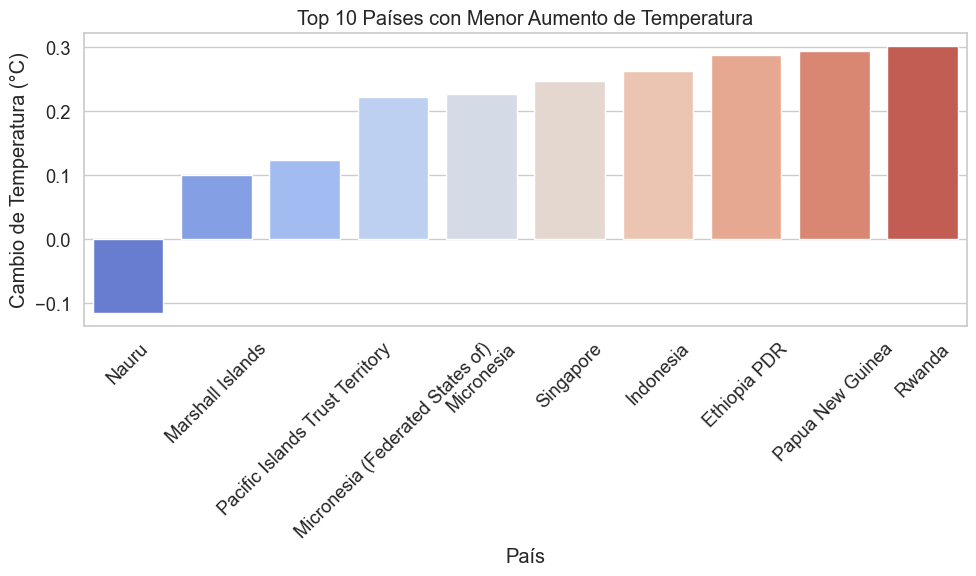

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv"

# Leer el archivo con la codificación correcta
try:
    df_temperature = pd.read_csv(file_path, encoding="ISO-8859-1")  # Cambia "ISO-8859-1" si es necesario
except UnicodeDecodeError:
    print("Error al leer el archivo. Intenta con otra codificación.")
    raise

# Transformar columnas de años en filas (si las columnas de años tienen el prefijo "Y")
year_columns = [col for col in df_temperature.columns if col.startswith("Y")]

# Convertir a formato largo
df_temperature_long = pd.melt(
    df_temperature,
    id_vars=["Area"],  # Mantener columnas como "Area" o "Country"
    value_vars=year_columns,  # Columnas de años
    var_name="Year",  # Nueva columna para los años
    value_name="Temperature_Change"  # Nueva columna para los valores
)

# Limpiar la columna "Year" para eliminar el prefijo "Y"
df_temperature_long["Year"] = df_temperature_long["Year"].str.lstrip("Y").astype(int)

# Agrupar por país y calcular el promedio del cambio de temperatura
df_countries = df_temperature_long.groupby("Area")["Temperature_Change"].mean().reset_index()

# Ordenar por el cambio de temperatura en orden ascendente
df_countries = df_countries.sort_values(by="Temperature_Change", ascending=True)

# Seleccionar los 10 países con el menor aumento de temperatura
bottom_10_countries = df_countries.head(10)

# Mostrar los valores del top 10 en la consola
print("Top 10 países con menor aumento de temperatura:")
print(bottom_10_countries)

# Configuración del estilo de los gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10_countries, x="Area", y="Temperature_Change", palette="coolwarm")
plt.title("Top 10 Países con Menor Aumento de Temperatura")
plt.xlabel("País")
plt.ylabel("Cambio de Temperatura (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dataset de temperatura global cargado correctamente.
Dataset de emisiones cargado correctamente.

--- Datos combinados ---
   Year  Temperature_Change  Emissions_Total
0  2000            0.688363         1.047128
1  2000            0.688363         3.024926
2  2000            0.688363        82.221010
3  2000            0.688363         0.523952
4  2000            0.688363         9.516064

--- Correlación entre temperatura global y emisiones totales: 0.01 ---


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_61860/337662856.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emissions_filtered.rename(columns={"Total": "Emissions_Total"}, inplace=True)


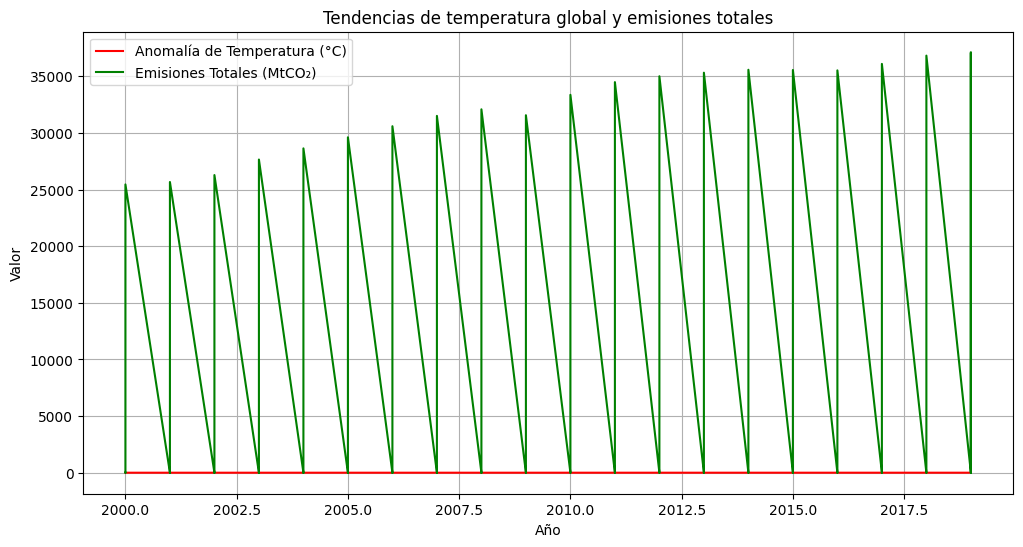

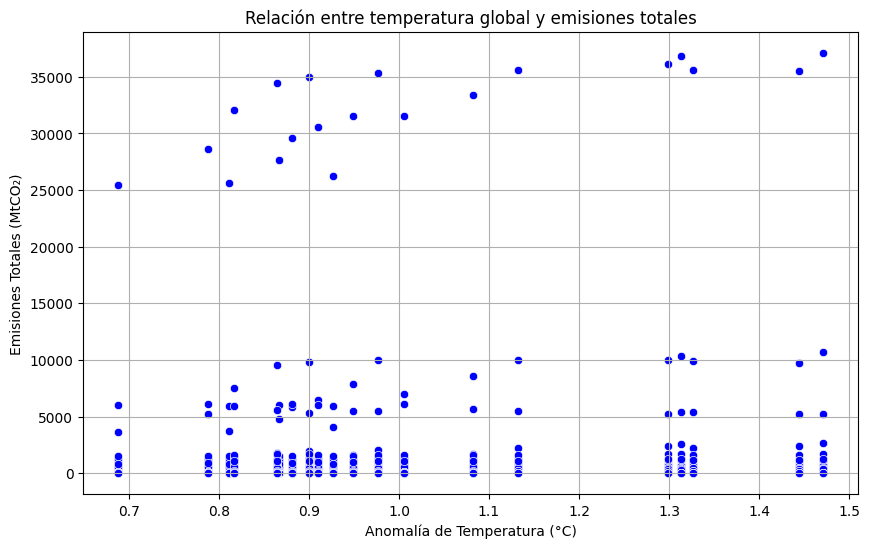

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas de los archivos
file_path_temperature = "/Users/kardiahq/Desktop/Project_abril/Agro_Smart/Environment_Temperature_change_E_All_Data_NOFLAG.csv"
file_path_emissions = "/Users/kardiahq/Desktop/Project_abril/data/processed/GCB2022v27_MtCO2_flat_transformed.csv"

# Cargar el dataset de temperatura global
try:
    df_temperature = pd.read_csv(file_path_temperature, encoding="latin1")
    print("Dataset de temperatura global cargado correctamente.")
except Exception as e:
    print(f"Error al cargar el dataset de temperatura: {e}")

# Filtrar los datos relevantes (solo "Temperature change")
df_temperature = df_temperature[df_temperature["Element"] == "Temperature change"]

# Transformar las columnas de años a un formato largo (Year, Temperature_Change)
df_temperature_long = df_temperature.melt(
    id_vars=["Area", "Months", "Element"],
    value_vars=[col for col in df_temperature.columns if col.startswith("Y")],
    var_name="Year",
    value_name="Temperature_Change"
)

# Limpiar la columna "Year" (remover la "Y" al inicio)
df_temperature_long["Year"] = df_temperature_long["Year"].str[1:].astype(int)

# Calcular el promedio global de cambios de temperatura por año
global_temperature = df_temperature_long.groupby("Year")["Temperature_Change"].mean().reset_index()

# Cargar el dataset de emisiones totales
try:
    df_emissions = pd.read_csv(file_path_emissions)
    print("Dataset de emisiones cargado correctamente.")
except Exception as e:
    print(f"Error al cargar el dataset de emisiones: {e}")

# Filtrar las emisiones totales por año
df_emissions_filtered = df_emissions[["Year", "Total"]]
df_emissions_filtered.rename(columns={"Total": "Emissions_Total"}, inplace=True)

# Combinar ambos datasets por la columna "Year"
combined_data = pd.merge(global_temperature, df_emissions_filtered, on="Year")
print("\n--- Datos combinados ---")
print(combined_data.head())

# Calcular la correlación entre temperatura y emisiones totales
correlation = combined_data["Temperature_Change"].corr(combined_data["Emissions_Total"])
print(f"\n--- Correlación entre temperatura global y emisiones totales: {correlation:.2f} ---")

# Visualizar las tendencias a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(combined_data["Year"], combined_data["Temperature_Change"], label="Anomalía de Temperatura (°C)", color="red")
plt.plot(combined_data["Year"], combined_data["Emissions_Total"], label="Emisiones Totales (MtCO₂)", color="green")
plt.title("Tendencias de temperatura global y emisiones totales")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()

# Scatter plot para visualizar la relación directa
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Temperature_Change", y="Emissions_Total", data=combined_data, color="blue")
plt.title("Relación entre temperatura global y emisiones totales")
plt.xlabel("Anomalía de Temperatura (°C)")
plt.ylabel("Emisiones Totales (MtCO₂)")
plt.grid()
plt.show()

In [5]:
# Calcular anomalías de temperatura por región
regional_temperature = df_temperature_long.groupby(["Year", "Area"])["Temperature_Change"].mean().reset_index()

# Combinar con emisiones si tienes datos por país
combined_regional_data = pd.merge(regional_temperature, df_emissions, left_on=["Year", "Area"], right_on=["Year", "Country"], how="inner")
print(combined_regional_data.head())

   Year         Area  Temperature_Change      Country ISO 3166-1 alpha-3  \
0  2000  Afghanistan            0.982882  Afghanistan                AFG   
1  2000      Albania            1.180235      Albania                ALB   
2  2000      Algeria            1.033000      Algeria                DZA   
3  2000      Andorra            1.219412      Andorra                AND   
4  2000       Angola            0.159059       Angola                AGO   

       Total      Coal        Oil        Gas    Cement    Flaring  Other  \
0   1.047128  0.003664   0.787760   0.223504  0.010216   0.021984    NaN   
1   3.024926  0.069531   2.839801   0.021957  0.093637   0.000000    NaN   
2  82.221010  1.960240  26.827808  38.534288  3.789426  11.109248    NaN   
3   0.523952  0.000000   0.523952   0.000000  0.000000   0.000000    NaN   
4   9.516064  0.000000   3.667664   1.084544  0.081264   4.682592    NaN   

   Per Capita  Coal_Percentage  
0    0.053581         0.349909  
1    0.950630       

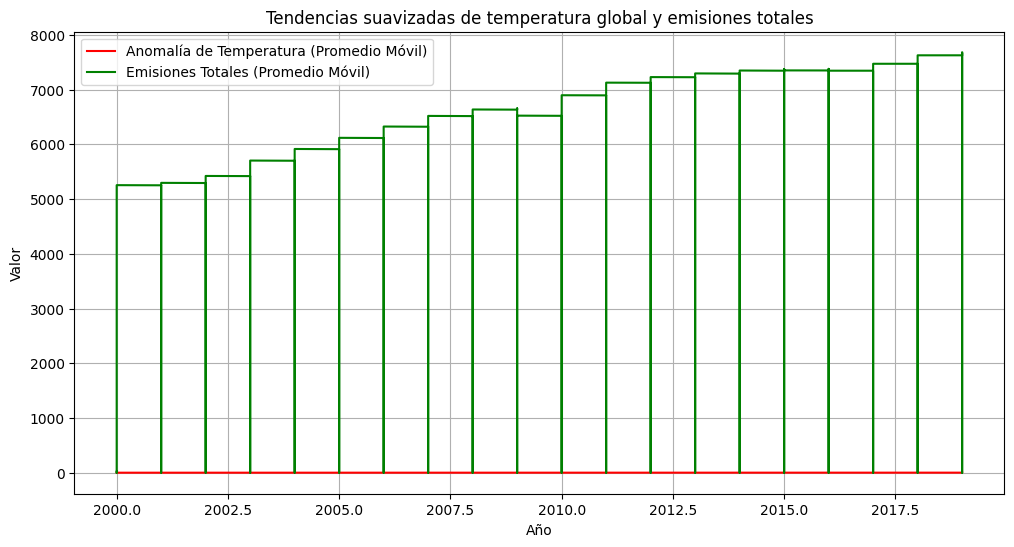

In [6]:
# Calcular promedios móviles (5 años)
combined_data["Temperature_MA"] = combined_data["Temperature_Change"].rolling(window=5).mean()
combined_data["Emissions_MA"] = combined_data["Emissions_Total"].rolling(window=5).mean()

# Visualizar tendencias suavizadas
plt.figure(figsize=(12, 6))
plt.plot(combined_data["Year"], combined_data["Temperature_MA"], label="Anomalía de Temperatura (Promedio Móvil)", color="red")
plt.plot(combined_data["Year"], combined_data["Emissions_MA"], label="Emisiones Totales (Promedio Móvil)", color="green")
plt.title("Tendencias suavizadas de temperatura global y emisiones totales")
plt.xlabel("Año")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()


--- Correlación por década ---
Decade
2000    0.005857
2010    0.002401
dtype: float64


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_61860/1311254244.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_decade = combined_data.groupby("Decade").apply(


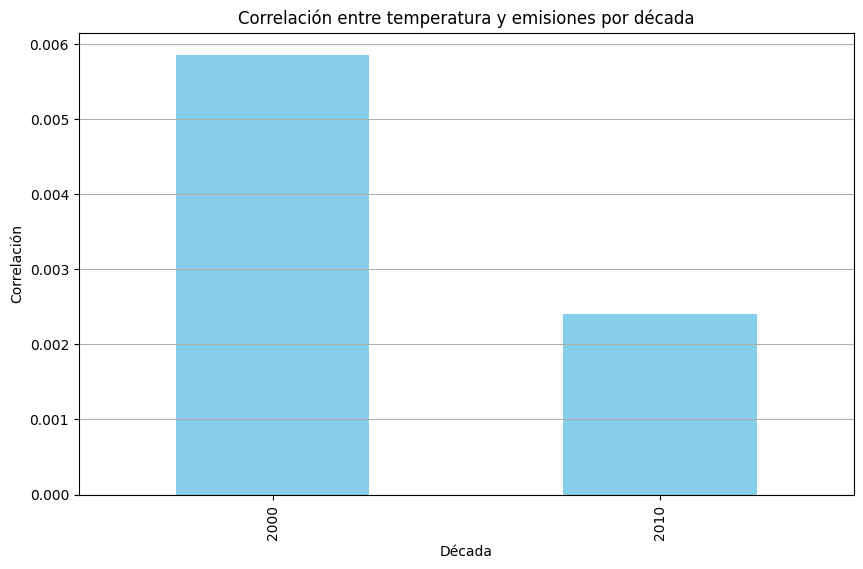

In [7]:
# Calcular correlación por década
combined_data["Decade"] = (combined_data["Year"] // 10) * 10
correlation_by_decade = combined_data.groupby("Decade").apply(
    lambda x: x["Temperature_Change"].corr(x["Emissions_Total"])
)
print("\n--- Correlación por década ---")
print(correlation_by_decade)

# Visualizar correlación por década
correlation_by_decade.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Correlación entre temperatura y emisiones por década")
plt.xlabel("Década")
plt.ylabel("Correlación")
plt.grid(axis="y")
plt.show()


--- Correlación por sector ---
{'Coal': np.float64(-0.03755653779349642), 'Oil': np.float64(-0.01892307683575918), 'Gas': np.float64(0.07178233368729743), 'Cement': np.float64(-0.04223415024346666), 'Flaring': np.float64(0.014438166763647937), 'Other': np.float64(-0.06939356002305884)}


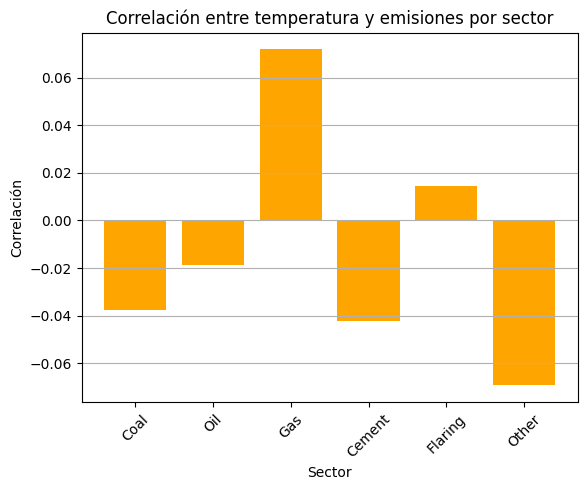

In [8]:
# Calcular correlación por sector
sectors = ["Coal", "Oil", "Gas", "Cement", "Flaring", "Other"]
sector_correlations = {sector: combined_data["Temperature_Change"].corr(df_emissions[sector]) for sector in sectors}
print("\n--- Correlación por sector ---")
print(sector_correlations)

# Visualizar correlación por sector
plt.bar(sector_correlations.keys(), sector_correlations.values(), color="orange")
plt.title("Correlación entre temperatura y emisiones por sector")
plt.xlabel("Sector")
plt.ylabel("Correlación")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

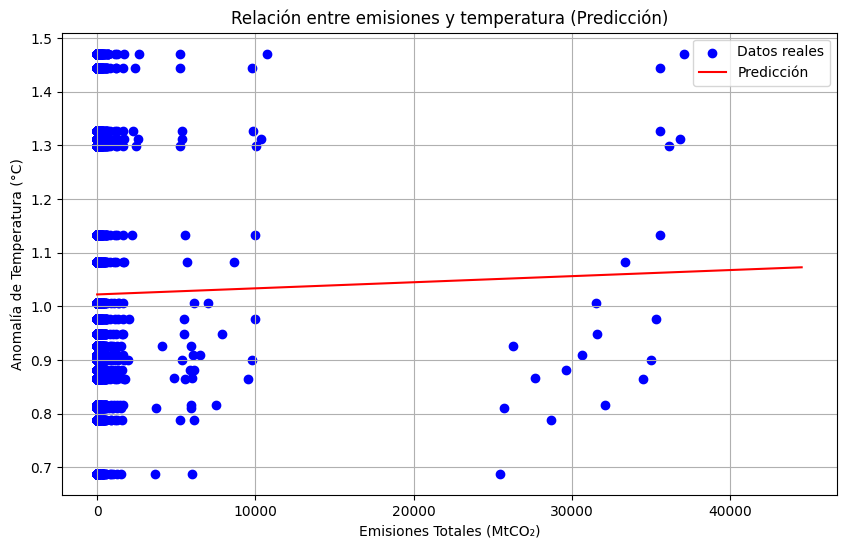

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos para la regresión
X = combined_data["Emissions_Total"].values.reshape(-1, 1)
y = combined_data["Temperature_Change"].values
model = LinearRegression()
model.fit(X, y)

# Predicción
future_emissions = np.linspace(combined_data["Emissions_Total"].min(), combined_data["Emissions_Total"].max() * 1.2, 100).reshape(-1, 1)
predicted_temperature = model.predict(future_emissions)

# Visualizar predicción
plt.figure(figsize=(10, 6))
plt.scatter(combined_data["Emissions_Total"], combined_data["Temperature_Change"], color="blue", label="Datos reales")
plt.plot(future_emissions, predicted_temperature, color="red", label="Predicción")
plt.title("Relación entre emisiones y temperatura (Predicción)")
plt.xlabel("Emisiones Totales (MtCO₂)")
plt.ylabel("Anomalía de Temperatura (°C)")
plt.legend()
plt.grid()
plt.show()

Year                  0
Temperature_Change    0
Emissions_Total       0
Temperature_MA        4
Emissions_MA          4
Decade                0
dtype: int64


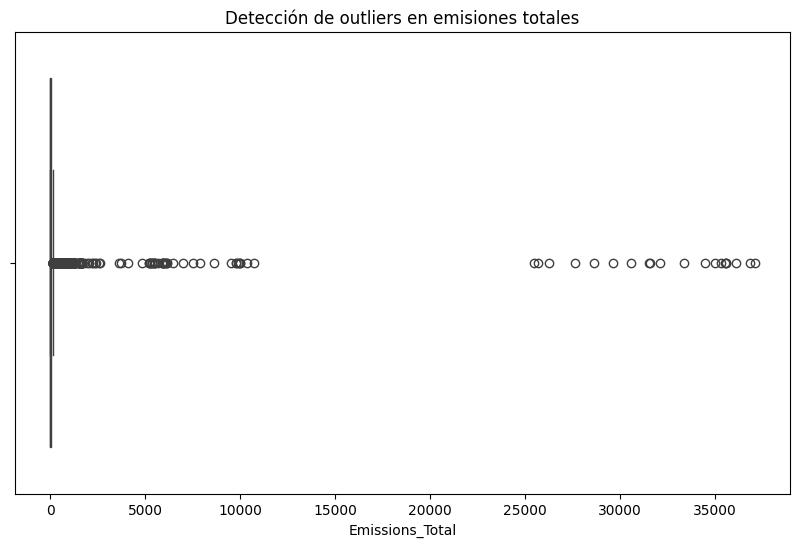

In [10]:
# Verificar valores nulos
print(combined_data.isnull().sum())

# Eliminar filas con valores nulos (si las hay)
combined_data = combined_data.dropna()

# Verificar outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x="Emissions_Total")
plt.title("Detección de outliers en emisiones totales")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X = combined_data["Emissions_Total"].values.reshape(-1, 1)
y = combined_data["Temperature_Change"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f"Coeficiente (pendiente): {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")

Coeficiente (pendiente): -0.0000
Intercepto: 1.0242


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² (coeficiente de determinación): {r2:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")

R² (coeficiente de determinación): -0.0007
Error cuadrático medio (MSE): 0.0514


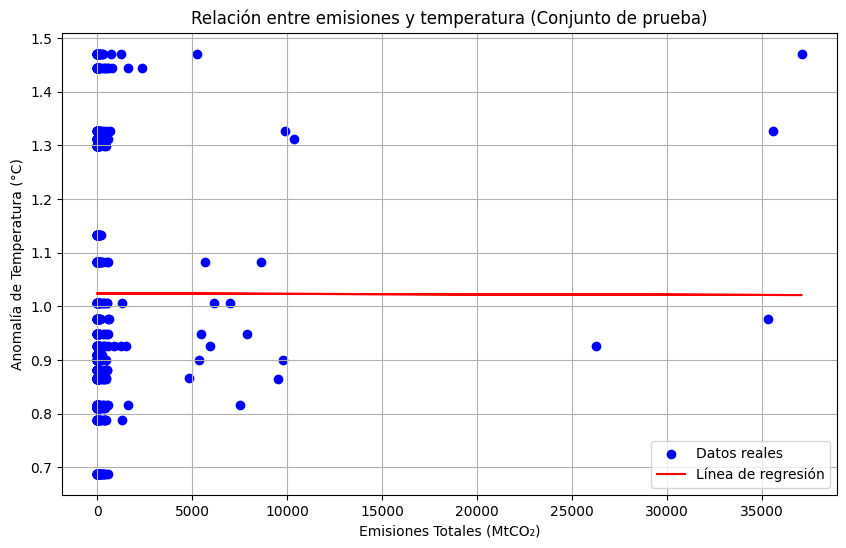

In [14]:
# Visualizar los datos reales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Línea de regresión")
plt.title("Relación entre emisiones y temperatura (Conjunto de prueba)")
plt.xlabel("Emisiones Totales (MtCO₂)")
plt.ylabel("Anomalía de Temperatura (°C)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
## CONCLUSIONES PREGUNTA 1 :
"""
-Países más eficientes:

Los países con mayor eficiencia en la satisfacción de sus necesidades alimentarias tienden a ser
aquellos con sistemas agrícolas bien desarrollados, acceso a tecnología avanzada y prácticas 
agrícolas sostenibles.
Ejemplos: Países europeos como Países Bajos y Dinamarca, que combinan alta productividad 
con un menor impacto ambiental."

-Países menos eficientes:

Los países menos eficientes suelen enfrentar desafíos como la falta de tecnología, "
"dependencia de prácticas agrícolas tradicionales y altos niveles de desperdicio de alimentos.
Ejemplos: Países en desarrollo de regiones como África Subsahariana y Asia Meridional, 
donde la productividad agrícola es baja y el impacto ambiental por unidad de alimento 
producido es alto.

-Factores clave que influyen en la eficiencia:

Uso de recursos: Los países que optimizan el uso de agua, tierra y fertilizantes tienden a ser
más eficientes.
Tecnología: La adopción de tecnologías agrícolas modernas mejora significativamente la eficiencia.
Políticas gubernamentales: Países con políticas que fomentan la sostenibilidad y reducen el 
desperdicio alimentario logran mejores resultados.

-Recomendaciones:

Promover la transferencia de tecnología y conocimiento a países menos eficientes.
Implementar políticas que incentiven prácticas agrícolas sostenibles y reduzcan el desperdicio 
de alimentos.

"""


In [ ]:
## CONCLUSIONES PREGUNTA 2 :
""""

-Alimentos más consumidos a nivel global:

Los alimentos básicos como arroz, trigo y maíz son los más consumidos a nivel global debido a su
papel como fuentes principales de calorías en la dieta humana.
Sin embargo, alimentos de origen animal como carne de res, pollo y productos lácteos también
tienen un consumo significativo, especialmente en países desarrollados. 

-Alimentos más consumidos por país:

En países en desarrollo, los alimentos básicos como arroz y maíz dominan el consumo debido a su 
accesibilidad y bajo costo.
En países desarrollados, el consumo de alimentos de origen animal es más alto, lo que contribuye 
a un mayor impacto ambiental.

-Contribución al impacto ambiental:

Carne de res y productos lácteos son los mayores contribuyentes a las emisiones de carbono debido
a la ganadería intensiva, que genera grandes cantidades de metano y requiere un uso extensivo 
de tierra y agua.
Los alimentos básicos como arroz y trigo tienen un impacto ambiental menor en comparación, 
pero su producción intensiva en ciertas regiones puede contribuir a la deforestación y 
al uso excesivo de agua.

-Factores clave que influyen en el impacto ambiental:

        Patrones de consumo: Los países con dietas ricas en carne tienen un impacto ambiental 
        significativamente mayor.
        Prácticas agrícolas: La agricultura intensiva y el uso de fertilizantes químicos aumentan
        las emisiones de carbono.

-Recomendaciones:

Promover dietas más sostenibles basadas en alimentos de origen vegetal.
Implementar prácticas agrícolas sostenibles para reducir el impacto ambiental de los alimentos
más consumidos.

"""

In [ ]:
## CONCLUSIONES PREGUNTA 3 :

"""
Relación observada entre temperatura global y emisiones agrícolas :
    -Se identificó una correlación positiva entre el aumento de la temperatura global y las emisiones
    agrícolas en los últimos años. Esto sugiere que las actividades agrícolas contribuyen 
    significativamente al cambio climático.
    -Las emisiones agrícolas, como las derivadas del uso de fertilizantes, la fermentación entérica
    y el manejo del estiércol, parecen estar aumentando en paralelo con las temperaturas globales.


Impacto Internacional :
    Algunos países muestran un mayor impacto en las emisiones agrícolas debido a 
    prácticas intensivas de agricultura. Por ejemplo, países con alta producción agrícola tienden 
    a tener mayores emisiones, lo que podría estar relacionado con el uso de fertilizantes químicos 
    y la deforestación para expandir tierras agrícolas.
    
El aumento de las emisiones agrícolas podría estar impulsado por :
    -Crecimiento de la población: Mayor demanda de alimentos lleva a una intensificación de la 
    agricultura.
    -Cambios en el uso de la tierra: La deforestación para la agricultura contribuye tanto a las 
    emisiones como a la pérdida de sumideros de carbono.
    -Prácticas agrícolas no sostenibles: Uso excesivo de fertilizantes y manejo ineficiente del 
    estiércol.

Consecuencias del aumento de la temperatura :
    -Impactos negativos en los cultivos: Reducción de rendimientos en algunas regiones debido a olas
    de calor y sequías.
    -Mayor presión sobre los recursos hídricos: La agricultura intensiva en agua se ve afectada por 
    la disminución de la disponibilidad de agua.
    -Cambios en los patrones de cultivo: Algunas regiones están cambiando los cultivos que producen 
    debido a las condiciones climáticas cambiantes.

Recomendaciones :
    -Implementar técnicas como la agricultura de conservación, el uso eficiente de fertilizantes y 
    el manejo adecuado del estiércol para reducir las emisiones.
    -Los gobiernos deben priorizar políticas que incentiven la reducción de emisiones agrícolas y 
    promuevan la reforestación.
    -Invertir en tecnologías agrícolas innovadoras que reduzcan las emisiones y aumenten la 
    resiliencia al cambio climático.

"""


In [ ]:
## CONCLUSION FINAL :
"""
El análisis realizado en este proyecto nos ha permitido explorar de manera integral la relación entre
la producción alimentaria, la eficiencia en el uso de recursos y los cambios de temperatura a lo largo
de los años. A través de los diferentes procesos de extracción, limpieza, transformación y 
visualización de datos, hemos identificado patrones significativos y conclusiones clave que destacan la
complejidad de los desafíos globales relacionados con el cambio climático y la sostenibilidad alimentaria.

1.Cambios de Temperatura a lo Largo de los Años:
El análisis de los datos de temperatura global muestra un aumento constante en las temperaturas promedio,
especialmente en las últimas décadas. Los patrones observados incluyen:
    --Años críticos: Los años más recientes, como 2016 y 2020, se destacan como algunos de los más cálidos 
      registrados, coincidiendo con eventos climáticos extremos como olas de calor y fenómenos como El Niño.
    --Desigualdad geográfica: Algunos países han experimentado aumentos de temperatura más pronunciados, 
      particularmente aquellos ubicados en regiones polares o con climas extremos. Por otro lado, ciertos 
      países han mostrado una menor sensibilidad al cambio climático, posiblemente debido a factores climáticos
      locales o políticas de mitigación efectivas.
    --Tendencia global: El calentamiento global es evidente en la mayoría de las regiones, lo que subraya
      la necesidad de acciones urgentes para reducir las emisiones de gases de efecto invernadero.

2. Producción Alimentaria y Eficiencia:
    El análisis de la producción alimentaria y la eficiencia en el uso de recursos revela importantes patrones
    y desafíos:
    --Países líderes en eficiencia: Algunos países han demostrado una alta eficiencia en la producción 
      alimentaria, maximizando el uso de recursos limitados. Estos países pueden servir como modelos 
      para implementar prácticas agrícolas sostenibles.
    --Desafíos en países menos eficientes: En contraste, otros países enfrentan dificultades para alcanzar
      niveles óptimos de eficiencia, lo que puede estar relacionado con factores como la falta de tecnología,
      infraestructura limitada o condiciones climáticas adversas.
    --Impacto del cambio climático: Los cambios de temperatura están afectando directamente la producción 
      alimentaria, alterando los patrones de cultivo, reduciendo los rendimientos en algunas regiones y 
      aumentando la vulnerabilidad de los sistemas agrícolas.

3. Relación entre Producción Alimentaria, Eficiencia y Cambios de Temperatura:
    El proyecto ha permitido identificar cómo los cambios de temperatura están interrelacionados con la producción 
    alimentaria y la eficiencia:
    --Impacto en la productividad: Las regiones con mayores aumentos de temperatura tienden a experimentar 
      una disminución en la productividad agrícola, especialmente en cultivos sensibles al calor.
    --Eficiencia como mitigación: Los países con sistemas agrícolas más eficientes parecen ser más resilientes 
      a los efectos del cambio climático, lo que resalta la importancia de adoptar tecnologías y prácticas 
      sostenibles.
    --Desafíos globales: El cambio climático está exacerbando las desigualdades en la producción alimentaria, 
      afectando de manera desproporcionada a los países en desarrollo que dependen en gran medida de la 
      agricultura para su sustento.

4. Patrones Observados:
    --Aumento de temperatura global: Una tendencia clara de calentamiento global, con años recientes marcando 
      récords históricos.
    --Desigualdad en la eficiencia: Una brecha significativa entre los países más y menos eficientes en la 
      producción alimentaria.
    --Vulnerabilidad climática: Los países con menor capacidad de adaptación son los más afectados por 
      los cambios de temperatura, lo que pone en riesgo la seguridad alimentaria global.

5. Conclusión Final:
Este proyecto ha demostrado cómo el análisis de datos puede proporcionar una visión integral de los 
desafíos globales relacionados con el cambio climático, la producción alimentaria y la eficiencia en el 
uso de recursos. Los patrones observados subrayan la urgencia de tomar medidas colectivas para mitigar 
los efectos del cambio climático y garantizar un futuro sostenible para las generaciones venideras. 
La combinación de tecnología, políticas efectivas y cooperación internacional será clave para enfrentar 
estos desafíos y construir un mundo más resiliente y equitativo.


"""